In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()

In [38]:
#import the data
data = pd.read_csv('master.csv')
country_code = pd.read_excel('Country Code.xlsx')

In [39]:
#check the data
country_code.head()

,country,code
0,Albania,ALB
1,Algeria,DZA
2,Antigua And Barbuda,ATG
3,Argentina,ARG
4,Armenia,ARM


In [40]:
#check the data
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [41]:
#Merge 2 data for chropleth visualization
data = data.merge(country_code,how = 'left', on = 'country')

In [42]:
#check data after merge
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,code
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,ALB


# Let see :
# 1.) The most country who has the biggest suicede rates
# 2.) Why it happens in that country ?

In [43]:
#check information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  code                19902 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [44]:
#change gdp_for_year to float for the analysis
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',','').astype(float)

In [45]:
#Menghilangkan kolom yang memiliki banyak missing data
data = data.drop('HDI for year', axis = 1)
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,code
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers,ALB


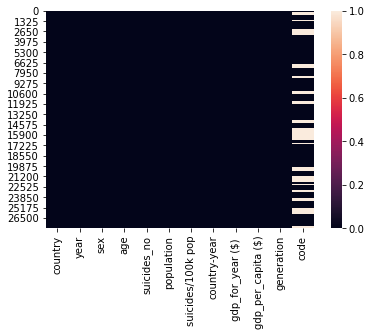

In [46]:
#visualize the null value
sns.heatmap(data.isnull())

In [47]:
#country without country code will not appear in the choropleth
data[data['code'].isnull()]['country'].unique()

array(['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Bahrain', 'Barbados',
       'Bosnia and Herzegovina', 'Cabo Verde', 'Cyprus', 'Czech Republic',
       'Dominica', 'Estonia', 'Grenada', 'Iceland', 'Kiribati', 'Kuwait',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Montenegro', 'Oman', 'Qatar', 'Republic of Korea',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and Grenadines', 'San Marino', 'Seychelles',
       'Slovenia', 'Suriname', 'Trinidad and Tobago', 'Turkmenistan',
       'Uzbekistan'], dtype=object)

In [48]:
#add suicide column to see acual suicide value in the countries
data['suicide'] = round((data['population']*data['suicides/100k pop'])/100,0)

In [49]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,code,suicide
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X,ALB,20996.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent,ALB,15985.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X,ALB,13993.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation,ALB,1001.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers,ALB,8997.0


In [50]:
#pivot based on country and code with sum suicide value
data1 = pd.pivot_table(data,values='suicide',index=['country','code'],aggfunc=np.sum).reset_index()

In [51]:
data1.head()

,country,code,suicide
0,Albania,ALB,1970043.0
1,Argentina,ARG,82217801.0
2,Armenia,ARM,1904916.0
3,Australia,AUS,70110343.0
4,Austria,AUT,50073464.0


In [52]:
#make parameter and layout which will be inputted to choropleth
data2=dict(type='choropleth',
          colorscale='magma',
          colorbar={'title':'Suicide'},
          locations=data1['code'],
          z=data1['suicide'],
          text=data1['country'])
layout=dict(title='Suicide from 1987 - 2016',
           geo=dict(showframe=False,
                    projection={'type':'natural earth'}))

In [53]:
#choropleth map visualization
choromap=go.Figure(data=[data2],layout=layout)
iplot(choromap)

[Text(0, 0, 'Albania'),
 Text(0, 0, 'Antigua and Barbuda'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Aruba'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Azerbaijan'),
 Text(0, 0, 'Bahamas'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Barbados'),
 Text(0, 0, 'Belarus'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Belize'),
 Text(0, 0, 'Bosnia and Herzegovina'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Bulgaria'),
 Text(0, 0, 'Cabo Verde'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Costa Rica'),
 Text(0, 0, 'Croatia'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Dominica'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'El Salvador'),
 Text(0, 0, 'Estonia'),
 Text(0, 0, 'Fiji'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Grenada'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'Guyana'),


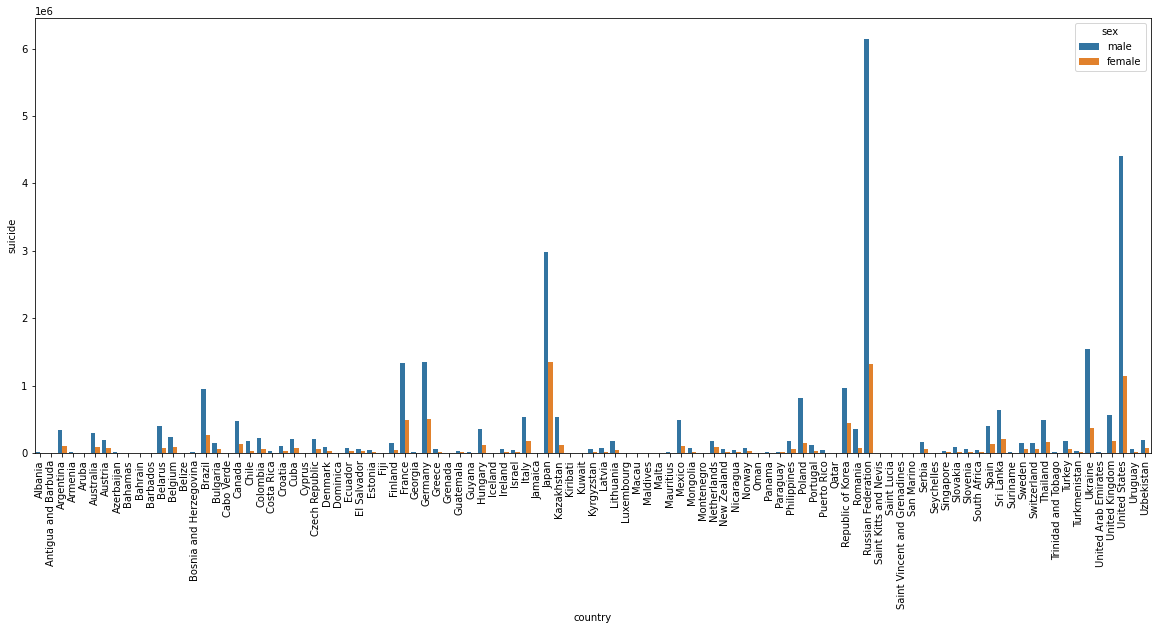

In [54]:
#Make sure to visualize the country who has the biggest suicide
plt.figure(figsize=(20,8))
sns.barplot(x='country',y='suicide',data=data,hue='sex',ci=None).set_xticklabels(labels=data['country'].unique(),rotation=90)

# The country who has the biggest suicide value: Rusia, US, dan Japan
# Man has higher suicide case in all Countries

In [55]:
#Focus on The country who has the biggest suicide value
data_small = data[(data['country']=='Japan') | 
                  (data['country']=='Russian Federation') |
                  (data['country']=='United States')
                 ]

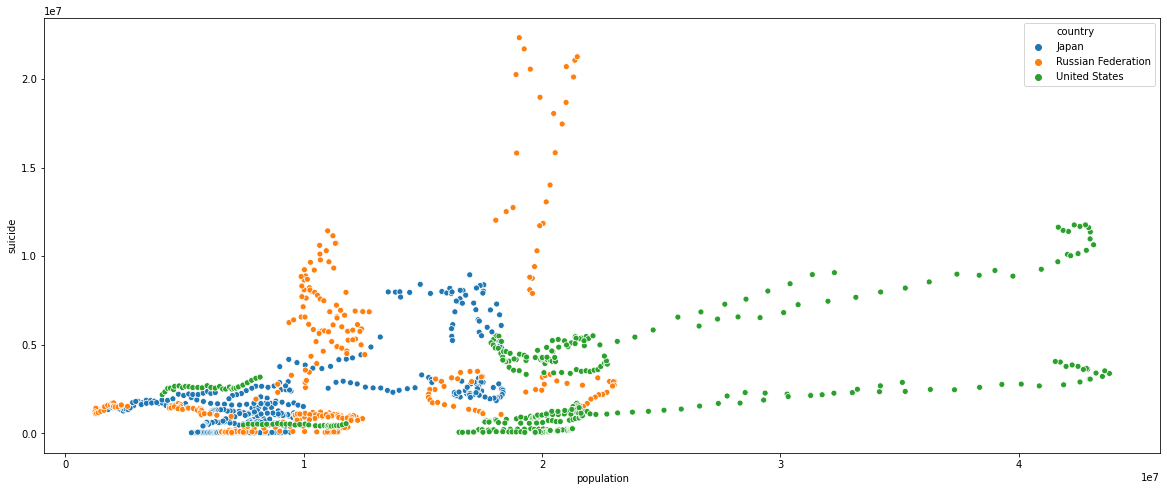

In [56]:
#Visualize Population and Suicide Value
plt.figure(figsize=(20,8))
sns.scatterplot(x='population',y='suicide',data=data_small,hue=data_small['country'])

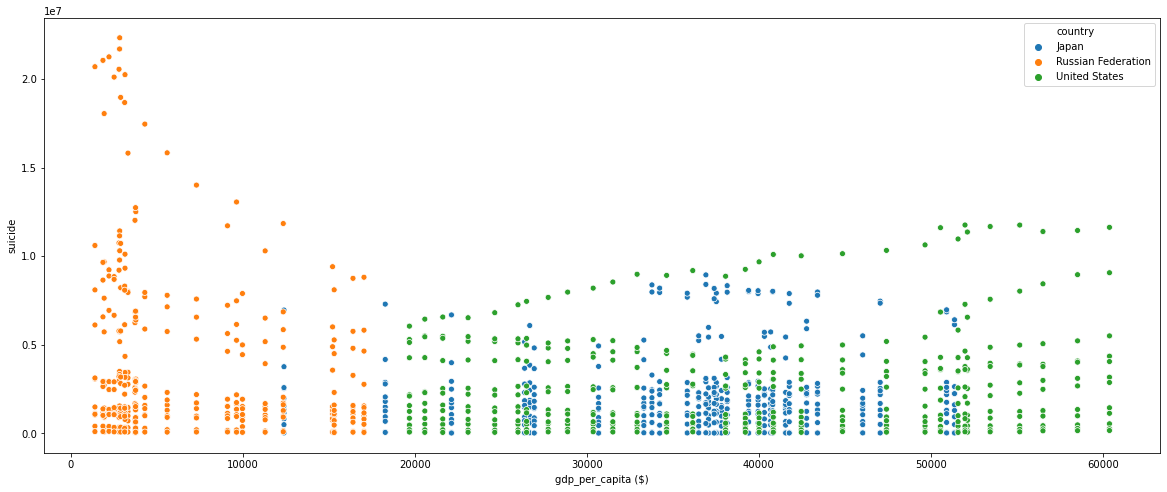

In [57]:
#Visualize gdp per kapita and Suicide Value
plt.figure(figsize=(20,8))
sns.scatterplot(x='gdp_per_capita ($)',y='suicide',data=data_small,hue=data_small['country'])

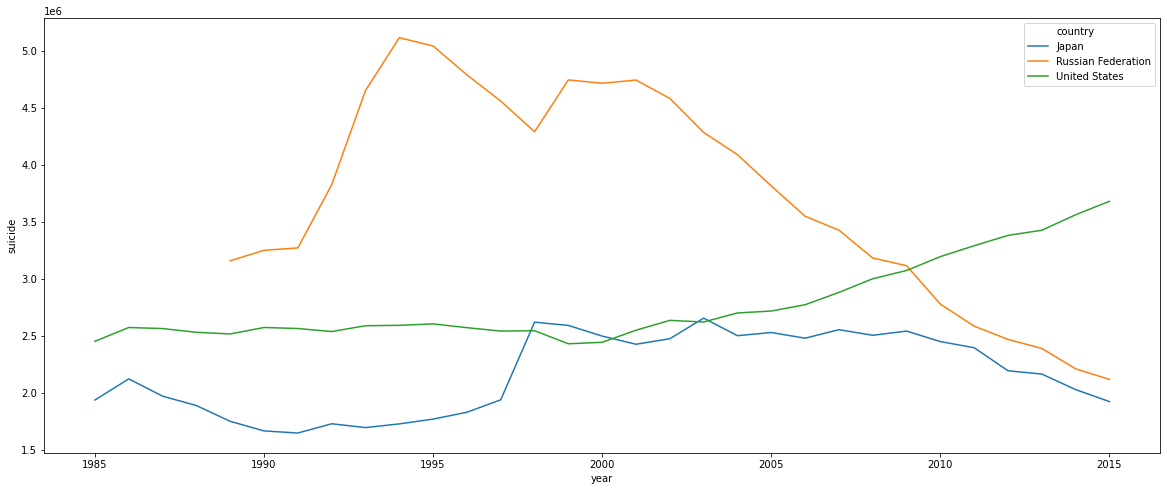

In [58]:
#Visualization of suicide value from 1987-2016
plt.figure(figsize=(20,8))
sns.lineplot(x='year',y='suicide',data=data_small,hue=data_small['country'],ci=None)

In [59]:
data_small['country'].unique()

array(['Japan', 'Russian Federation', 'United States'], dtype=object)

In [60]:
#Check the peak of russia and US condition
rusia_tinggi = data_small[(data_small['year']>1990) & (data_small['year']<2007) & (data_small['country']=='Russian Federation')]
us_tinggi = data_small[data_small['year']>2000 & (data_small['country'] == 'United States')]

In [61]:
#Check correlation all data based on suicide value for rusia
rusia_tinggi.corr()['suicide'].sort_values()

gdp_per_capita ($)   -0.065742
 gdp_for_year ($)    -0.065594
year                 -0.015493
population            0.463957
suicides/100k pop     0.730969
suicides_no           1.000000
suicide               1.000000
Name: suicide, dtype: float64

In [62]:
#Check correlation all data based on suicide value for US
us_tinggi.corr()['suicide'].sort_values()

gdp_per_capita ($)   -0.132888
 gdp_for_year ($)    -0.047860
year                  0.022802
population            0.372416
suicides/100k pop     0.668796
suicides_no           1.000000
suicide               1.000000
Name: suicide, dtype: float64

In [63]:
#Check correlation all data based on suicide value for US
data_small.corr()['suicide'].sort_values()

gdp_per_capita ($)   -0.132888
 gdp_for_year ($)    -0.047860
year                  0.022802
population            0.372416
suicides/100k pop     0.668796
suicides_no           1.000000
suicide               1.000000
Name: suicide, dtype: float64

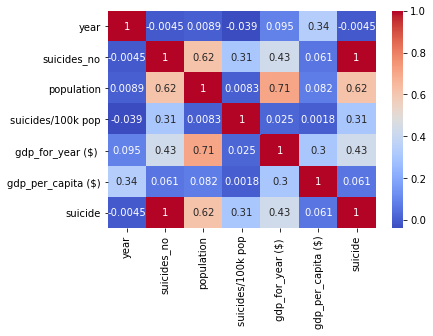

In [64]:
#Check in general correlation
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# In general, higher population and low GDP/capita makes probability of suicide increase.
# In Russia, suicide occurred while low GDP/capita.
# In 1991-2006, Russia has the peak of suicide value.
# From wikipedia, in 1991, Uni Soviet has separated into some countries, on of them is Rusia.
# Separation of Uni Soviet made many conflicts, crisis, and unstable goverment.
# Sucide in US tends to increase each year. It has possibility from high population and pressure in US.
# Japan has relatively stable suicide cases each year. Regarding to wikipedia, private employee and unemployment has the biggest suicide cases.

# NEXT QUESTION : HOW ABOUT SUICIDE RATES CONDITION ?

In [65]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,code,suicide
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X,ALB,20996.0
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent,ALB,15985.0
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X,ALB,13993.0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation,ALB,1001.0
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers,ALB,8997.0


In [66]:
data3 = pd.pivot_table(data,values=['suicide','population'],index=['country'],aggfunc=np.sum).reset_index()

In [67]:
data3['suicide rate'] = data3['suicide']/data3['population']

In [68]:
data3.head()

,country,population,suicide,suicide rate
0,Albania,62325467,1970043.0,0.031609
1,Antigua and Barbuda,1990228,11000.0,0.005527
2,Argentina,1035985431,82217801.0,0.079362
3,Armenia,77348173,1904916.0,0.024628
4,Aruba,1259677,101000.0,0.080179


[Text(0, 0, 'Albania'),
 Text(0, 0, 'Antigua and Barbuda'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Aruba'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Azerbaijan'),
 Text(0, 0, 'Bahamas'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Barbados'),
 Text(0, 0, 'Belarus'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Belize'),
 Text(0, 0, 'Bosnia and Herzegovina'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Bulgaria'),
 Text(0, 0, 'Cabo Verde'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Costa Rica'),
 Text(0, 0, 'Croatia'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Dominica'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'El Salvador'),
 Text(0, 0, 'Estonia'),
 Text(0, 0, 'Fiji'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Grenada'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'Guyana'),


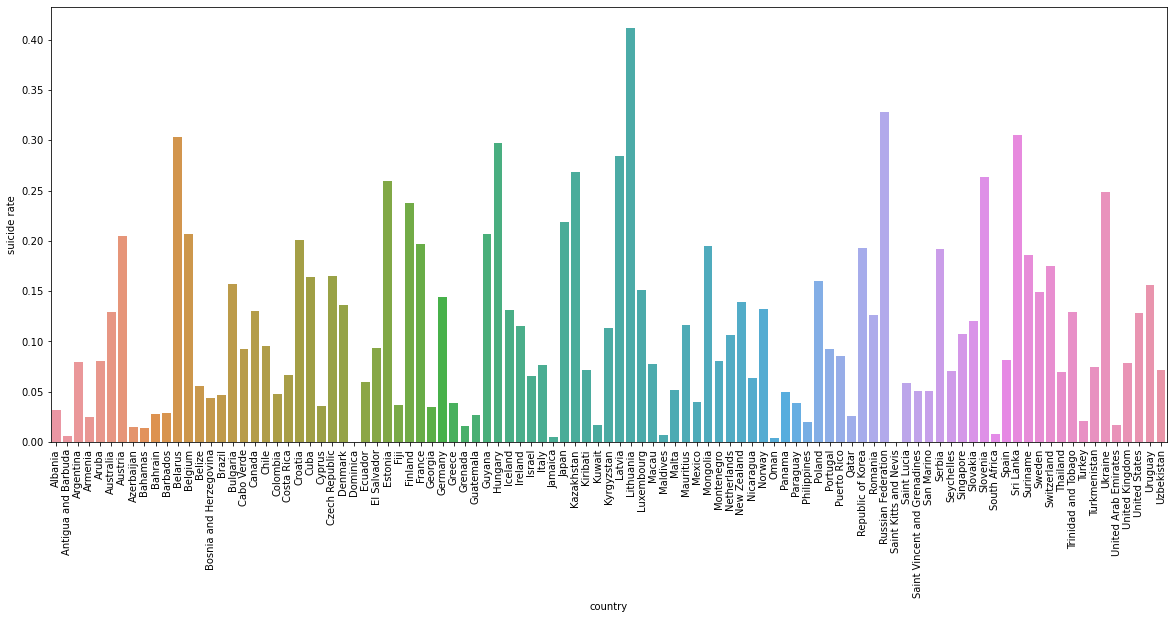

In [69]:
#Visualize the country who has the biggest suicide rate
plt.figure(figsize=(20,8))
sns.barplot(x='country',y='suicide rate',data=data3,ci=None).set_xticklabels(labels=data3['country'].unique(),rotation=90)

In [70]:
#Check country who has suicide rates > 0.2
data3[data3['suicide rate']>0.2]['country'].unique()

array(['Austria', 'Belarus', 'Belgium', 'Croatia', 'Estonia', 'Finland',
       'Guyana', 'Hungary', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania',
       'Russian Federation', 'Slovenia', 'Sri Lanka', 'Ukraine'],
      dtype=object)

In [71]:
#Focus on The country who has the biggest suicide rate
data_small = data[(data['country']=='Austria') | 
                  (data['country']=='Belarus') |
                  (data['country']=='Croatia') |
                  (data['country']=='Estonia') |
                  (data['country']=='Finland') |
                  (data['country']=='Guyana') |
                  (data['country']=='Japan') |
                  (data['country']=='Kazakhstan') |
                  (data['country']=='Lithuania') |
                  (data['country']=='Russian Federation') |
                  (data['country']=='SLovenia') |
                  (data['country']=='Sri Lanka') |
                  (data['country']=='Ukraine') |
                  (data['country']=='Republic of Korea')
                 ]

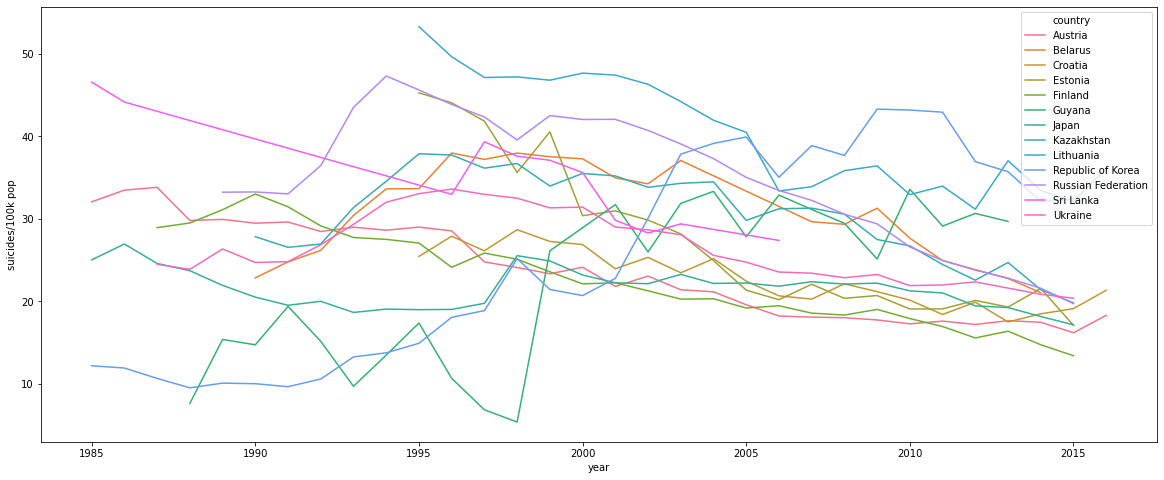

In [72]:
#Visualization of suicide value from 1987-2016
plt.figure(figsize=(20,8))
sns.lineplot(x='year',y='suicides/100k pop',data=data_small,hue=data_small['country'],ci=None)

# Suiside Rate tend to decrease